<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Machine%20Learning/Previsao/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 8 color = 'darkblue'> Machine Learnig - Detalhando Classificação</font>

#Sobre o Autor e o Notebook
Neste notebook contém estudos a respeito da técnica de classificação de Machine Learning, utilizando a biblioteca scikit-learn.

Este notebook possuirá diversas referencias, sendo uma delas o curso de machine learning da Alura. No entanto o autor tem suas informações detalhadas abaixo.

<font size =4> **Autor:** Kaue Hermann Abbehausen</font>

<font size =4> **Linkedin:** https://www.linkedin.com/in/kaue-abbehausen-5b1922165/</font>


<font size = 5 color = 'Black'> Sobre os dados</font>

Os dados que serão utilizados é de comportamento do cliente adentrando páginas de um site e avaliando se ele comprou ou não o produto. O que queremos é criar um modelo que informe se o cliente comprará ou não certo produto.

A base de dados que será utilizada neste notebook se encontra no link abaixo:
* [DADOS NO GITHUB](https://https://github.com/KaueAbbe/Projeto-Estude_Python/tree/main/Estude%20Machine%20Learning/dados)

# Importando biblioteca e dados

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/KaueAbbe/Projeto-Estude_Python/main/Estude%20Machine%20Learning/dados/acesso.csv'
acesso = pd.read_csv(url)

In [3]:
acesso.head(10)

,acessou_home,acessou_como_funciona,acessou_contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
5,1,0,1,1
6,1,1,0,0
7,1,0,1,1
8,1,1,0,0
9,1,0,1,1


 * 1 - Significa Sim
 * 0 - Significa Não

# Leve análise exploratória

In [4]:
acesso.groupby('comprou').sum()

,acessou_home,acessou_como_funciona,acessou_contato
comprou,,,
0,21,34,31
1,32,6,31


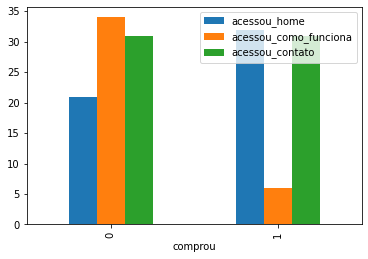

In [5]:
acesso.groupby('comprou').sum().plot(kind = 'bar')

A maioria dos clientes que acessam como funciona não compram

# Como criar o modelo
Este modelo é um modelo básico para compreender os detalhes da criação de um modelo. Nas atividades seguintes estarão outros modelos com outros dados que tem o papel de fixar o conhecimento e debater outros assuntos.

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [7]:
x = acesso.drop('comprou', axis = 1)
y = acesso.comprou

In [8]:
x.head()

,acessou_home,acessou_como_funciona,acessou_contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [10]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [11]:
modelo = MultinomialNB()

In [12]:
modelo.fit(x_treino, y_treino)

MultinomialNB()

In [13]:
acuracia = modelo.score(x_teste, y_teste)*100
print(f'A acurácia foi de {round(acuracia,2)}%')

A acurácia foi de 86.67%


# Passos de criação de Modelo e Detalhes
## Primeiro Estudos

Vou separar a criação do modelo em 5 passos, sem pular o fato de que deve preparar os dados antes de criar o modelo. Segue abaixo alguns detalhes de como preparar os dados e os passos
## Passos 1: Preparar os Dados | Variáveis Categóricas
Para entender variáveis categóricas vamos analisar o dataset abaixo, focando na coluna busca

In [14]:
url = 'https://raw.githubusercontent.com/KaueAbbe/Projeto-Estude_Python/main/Estude%20Machine%20Learning/dados/busca.csv'
busca = pd.read_csv(url)
busca.head()

,home,busca,logado,comprou
0,0,algoritmos,1,1
1,0,java,0,1
2,1,algoritmos,0,1
3,1,ruby,1,0
4,1,ruby,0,1


In [15]:
busca.busca.unique()

array(['algoritmos', 'java', 'ruby'], dtype=object)

Temos 3 valores únicos nesta variávels e queremos transforma-los em valores binários (0,1) para colocarmos no nosso modelo. O pandas consegue fazer isto para nós utilizando get_dummies. O dummies vem do fato de que a coluna busca será transformada em outras 3 colunas, chamadas de variáveis dummies.

In [16]:
buscaDummies = pd.get_dummies(busca)
buscaDummies.head()

,home,logado,comprou,busca_algoritmos,busca_java,busca_ruby
0,0,1,1,1,0,0
1,0,0,1,0,1,0
2,1,0,1,1,0,0
3,1,1,0,0,0,1
4,1,0,1,0,0,1


Agora que temos nossos valores binários podemos utilizá-lo parar criar nosso algoritmo.
## Passo 2: Criando um modelo


In [26]:
buscaDummies[0:int(0.9*len(buscaDummies))]

,home,logado,comprou,busca_algoritmos,busca_java,busca_ruby
0,0,1,1,1,0,0
1,0,0,1,0,1,0
2,1,0,1,1,0,0
3,1,1,0,0,0,1
4,1,0,1,0,0,1
...,...,...,...,...,...,...
895,0,1,1,0,1,0
896,1,0,1,1,0,0
897,0,0,1,0,0,1
898,1,1,1,1,0,0


1. Separando nossos dados de treino, teste e validação

In [30]:
x = buscaDummies[0:int(0.9*len(buscaDummies))].drop('comprou', axis = 1)
y = buscaDummies[0:int(0.9*len(buscaDummies))].comprou
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3, random_state = 42)

x_validacao = buscaDummies[int(0.9*len(buscaDummies)):].drop('comprou', axis = 1)
y_validacao = buscaDummies[int(0.9*len(buscaDummies)):].comprou

<font color = 'green' size =5> Debatendo o MultinomialNB (Baseado em Bernoulli Naive Bayes)</font>

O Bernoulli Naive Bayes funciona baseado em probabilidade, e probabilidade condicional. Para alcançar o resultado de previsão, o modelo faz tabelas de probabilidade de escolha para cada variável. A ideia de probabilidade simples: Qual a probabilidade de escolher aleatoriamente uma pessoa que entrou na home?

Fazendo isto para todas as variáveis ele calcula a probabilidade de uma pessoa ter feito a variável 1 e a variável 2. Após isto, esta variável dá a probabilidade de a poder se encaixar como comprador ou não, e a depender deste valor o modelo toma sua decisão.

[LEIA MAIS AQUI](https://https://iq.opengenus.org/bernoulli-naive-bayes/)

In [31]:
modelo = MultinomialNB()
modelo.fit(x_treino, y_treino)
acuracia = modelo.score(x_teste, y_teste)*100
print(f'A acurácia foi de {round(acuracia,2)}%')

A acurácia foi de 84.07%


## Passo 3: Comparar nosso modelo com modelo Base

Para comparar nosso modelo vamos utilizar um modelo mais simples como modelo de base. Este modelo funciona devolvendo sempre a mesma resposta.

Vamos ver o que acontece quando o nosso modelo responde sempre 1 ou sempre 0.

In [32]:
Quanti_1 = busca.comprou.value_counts()[1]
acertos_1 = Quanti_1/len(busca.comprou) * 100

Quanti_0 = busca.comprou.value_counts()[0]
acertos_0 = Quanti_0/len(busca.comprou) * 100

print(f'Apenas 1 acertou {acertos_1}%')
print(f'Apenas 0 acertou {acertos_0}%')
print(f'A acurácia do modelo: {round(acuracia,2)}%')

Apenas 1 acertou 83.2%
Apenas 0 acertou 16.8%
A acurácia do modelo: 84.07%


Vemos com estes valores que o modelo acerta 0,13% a mais que o modelo apenas 1. Logo nosso base está muito próximo da linha de base. Precisamos melhorar este modelo. Podemos fazer esta mesma sequência de linhas com um modelo do scikit-learn, chamado: Dummy

## Passo 4: Criando segundo(ou mais) Modelo: Adaboost

Após criar o segundo modelo (e outros) analisar quem é o modelo que teve maior acurácia e escolher ele para os dados de validação

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
modeloada = AdaBoostClassifier()
modeloada.fit(x_treino, y_treino)
acuraciaada = modeloada.score(x_teste, y_teste)*100
print(f'A acurácia Ada foi de {round(acuraciaada,2)}%')

A acurácia Ada foi de 86.67%


In [35]:
print(f'Apenas 1 acertou {acertos_1}%')
print(f'Apenas 0 acertou {acertos_0}%')
print(f'A acurácia do modelo: {round(acuracia,2)}%')
print(f'A acurácia Ada foi de {round(acuraciaada,2)}%')

Apenas 1 acertou 83.2%
Apenas 0 acertou 16.8%
A acurácia do modelo: 84.07%
A acurácia Ada foi de 86.67%


## Passo 4: Validação do Melhor Modelo

O melhor modelo foi o Ada. Por isto vamos pegar este modelo e dar novos valores a ele, e assim verificar se está válido as respostas dele. É importante que não haja diferença de acurácia entre o teste e a validação, e que o resultado continue acima do modelo base.

In [36]:
acuraciaada_valida = modeloada.score(x_validacao, y_validacao)*100
print(f'A acurácia de validação foi de {round(acuraciaada_valida,2)}%')

A acurácia de validação foi de 85.0%


# Segundo Estudo